# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure S4

## Panel a

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

coefs_1storder = pd.read_csv(path+'/Fig3/FYN-SH3/FYN_mochi_order1/task_1/weights/weights_Folding.txt',
                       sep='\t')
coefs_2ndorder = pd.read_csv(path+'/Fig3/FYN-SH3/FYN_mochi_order2/task_1/weights/weights_Folding.txt',
                       sep='\t')
coefs_2ndorder_sprsreg = pd.read_csv(path+'/Fig3/FYN-SH3/FYN_mochi_order2_sparse_regularized/task_4/weights/weights_Folding.txt',
                       sep='\t')

for coefs in [coefs_1storder, coefs_2ndorder, coefs_2ndorder_sprsreg]:

    coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
    for index, row in coefs.iterrows():
        if row.id_ref =='WT':
            coefs.at[index,'order']=0
        else:
            coefs.at[index,'order']=len(row.id.split('_'))

Biophysical model
(1st order)


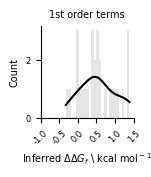

In [3]:
print("Biophysical model\n(1st order)")
for group in coefs_1storder.loc[coefs_1storder['order']>0].groupby('order'):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    sns.histplot(group[1]['mean_kcal_mol'], kde=True, bins=25, alpha=0.1,linewidth=0, color='k',ax=ax)
    ax.spines[['top','right']].set_visible(False)
    #plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    ax.set_ylabel('Count', fontsize=7)
    ax.set_xticks(np.arange(-1,2,0.5),np.arange(-1,2,0.5),fontsize=6, rotation=45)
    if group[1].iloc[0]['order']==1:
        ax.set_xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('1st order terms', fontsize=7)
    if group[1].iloc[0]['order']>1:
        ax.set_xlabel(r'Inferred ${ΔΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('2nd order terms', fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_Mochi_1stordermodel_order'+str(group[1].iloc[0]['order'])+'terms_hist.svg', dpi=300, transparent=True, bbox_inches='tight')

Biophysical model
(2nd order)


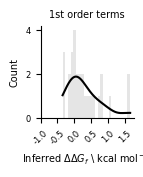

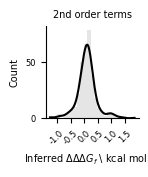

In [4]:
print("Biophysical model\n(2nd order)")
for group in coefs_2ndorder.loc[coefs_2ndorder['order']>0].groupby('order'):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    sns.histplot(group[1]['mean_kcal_mol'], kde=True, bins=25, alpha=0.1,linewidth=0, color='k',ax=ax)
    ax.spines[['top','right']].set_visible(False)
    plt.yticks(fontsize=6)
    ax.set_ylabel('Count', fontsize=7)
    ax.set_xticks(np.arange(-1,2,0.5),np.arange(-1,2,0.5),fontsize=6, rotation=45)
    if group[1].iloc[0]['order']==1:
        ax.set_xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('1st order terms', fontsize=7)
    if group[1].iloc[0]['order']>1:
        ax.set_xlabel(r'Inferred ${ΔΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('2nd order terms', fontsize=7)
        
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_Mochi_2ndordermodel_order'+str(group[1].iloc[0]['order'])+'terms_hist.svg', dpi=300, transparent=True, bbox_inches='tight')

Biophysical model
(2nd order
sparse regularized)


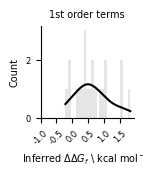

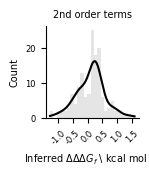

In [5]:
print("Biophysical model\n(2nd order\nsparse regularized)")
for group in coefs_2ndorder_sprsreg.loc[coefs_2ndorder_sprsreg['order']>0].groupby('order'):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    sns.histplot(group[1]['mean_kcal_mol'], kde=True, bins=25, alpha=0.1,linewidth=0, color='k',ax=ax)
    ax.spines[['top','right']].set_visible(False)
    plt.yticks(fontsize=6)
    ax.set_ylabel('Count', fontsize=7)
    ax.set_xticks(np.arange(-1,2,0.5),np.arange(-1,2,0.5),fontsize=6, rotation=45)
    if group[1].iloc[0]['order']==1:
        ax.set_xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('1st order terms', fontsize=7)
    if group[1].iloc[0]['order']>1:
        ax.set_xlabel(r'Inferred ${ΔΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('2nd order terms', fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_Mochi_2ndordersprsregmodel_order'+str(group[1].iloc[0]['order'])+'terms_hist.svg', dpi=300, transparent=True, bbox_inches='tight')

## Panel b

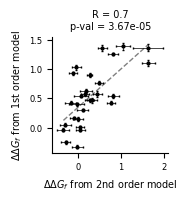

In [6]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

coefs_1storder = coefs_1storder.rename(columns={'mean_kcal_mol':'mean_kcal_mol_1storder', 'std_kcal_mol':'std_kcal_mol_1storder'})
coefs_2ndorder = coefs_2ndorder.rename(columns={'mean_kcal_mol':'mean_kcal_mol_2ndorder', 'std_kcal_mol':'std_kcal_mol_2ndorder'})

vs_model = coefs_1storder.loc[coefs_1storder['order']==1].merge(coefs_2ndorder.loc[coefs_2ndorder['order']==1], left_on='id_ref', right_on='id_ref')

vs_model=vs_model.sort_values('mean_kcal_mol_2ndorder').loc[vs_model['order_x']==1]

x = vs_model[['mean_kcal_mol_2ndorder']].to_numpy()
y = vs_model[['mean_kcal_mol_1storder']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax=plt.subplots(figsize=(1.5,1.5))
plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
ax.errorbar(vs_model[['mean_kcal_mol_2ndorder']].to_numpy().ravel(),vs_model[['mean_kcal_mol_1storder']].to_numpy().ravel(),vs_model[['std_kcal_mol_1storder']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder']].to_numpy().ravel(), color='k',linewidth=0,
           markersize=2,marker='o', capsize=0.5, elinewidth=0.5)
ax.set_ylabel(r'${ΔΔG_{f}}$ from 1st order model', fontsize=7)
ax.set_xlabel(r'${ΔΔG_{f}}$ from 2nd order model', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_1storderterms_2ndorder_vs_1storder_FoldingddGs_TrueWT_recalibrated.svg', dpi=300, transparent=True, bbox_inches='tight')


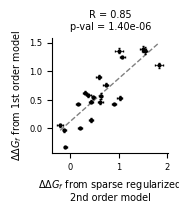

In [7]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

coefs_2ndorder_sprsreg = coefs_2ndorder_sprsreg.rename(columns={'mean_kcal_mol':'mean_kcal_mol_2ndorder_sprsreg', 'std_kcal_mol':'std_kcal_mol_2ndorder_sprsreg'})

vs_model = coefs_1storder.loc[coefs_1storder['order']==1].merge(coefs_2ndorder_sprsreg.loc[coefs_2ndorder_sprsreg['order']==1], left_on='id_ref', right_on='id_ref')

vs_model=vs_model.sort_values('mean_kcal_mol_2ndorder_sprsreg').loc[vs_model['order_x']==1]

x = vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy()
y = vs_model[['mean_kcal_mol_1storder']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax=plt.subplots(figsize=(1.5,1.5))
plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
ax.errorbar(vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['mean_kcal_mol_1storder']].to_numpy().ravel(),vs_model[['std_kcal_mol_1storder']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(), color='k',linewidth=0,
           markersize=2,marker='o', capsize=0.5, elinewidth=0.5)
ax.set_ylabel(r'${ΔΔG_{f}}$ from 1st order model', fontsize=7)
ax.set_xlabel(r'${ΔΔG_{f}}$ from sparse regularized'+'\n2nd order model', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_1storderterms_2ndorder_sprsreg_vs_1storder_FoldingddGs_TrueWT_recalibrated.svg', dpi=300, transparent=True, bbox_inches='tight')


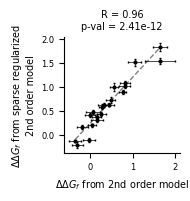

In [8]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

coefs_2ndorder = coefs_2ndorder.rename(columns={'mean_kcal_mol':'mean_kcal_mol_2ndorder', 'std_kcal_mol':'std_kcal_mol_2ndorder'})

vs_model = coefs_2ndorder_sprsreg.loc[coefs_2ndorder_sprsreg['order']==1].merge(coefs_2ndorder.loc[coefs_2ndorder['order']==1], left_on='id_ref', right_on='id_ref')

vs_model=vs_model.sort_values('mean_kcal_mol_2ndorder').loc[vs_model['order_x']==1]

x = vs_model[['mean_kcal_mol_2ndorder']].to_numpy()
y = vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax=plt.subplots(figsize=(1.5,1.5))
plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
ax.errorbar(vs_model[['mean_kcal_mol_2ndorder']].to_numpy().ravel(),vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder']].to_numpy().ravel(), color='k',linewidth=0,
           markersize=2,marker='o', capsize=0.5, elinewidth=0.5)
ax.set_ylabel(r'${ΔΔG_{f}}$ from sparse regularized'+'\n2nd order model', fontsize=7)
ax.set_xlabel(r'${ΔΔG_{f}}$ from 2nd order model', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_sprsregterms_2ndorder_vs_2ndorder_sprsreg_FoldingddGs_TrueWT_recalibrated.svg', dpi=300, transparent=True, bbox_inches='tight')


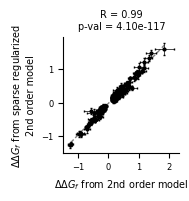

In [9]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

coefs_2ndorder = coefs_2ndorder.rename(columns={'mean_kcal_mol':'mean_kcal_mol_2ndorder', 'std_kcal_mol':'std_kcal_mol_2ndorder'})

vs_model = coefs_2ndorder_sprsreg.loc[coefs_2ndorder_sprsreg['order']==2].merge(coefs_2ndorder.loc[coefs_2ndorder['order']==2], left_on='id_ref', right_on='id_ref')

vs_model=vs_model.sort_values('mean_kcal_mol_2ndorder').loc[vs_model['order_x']==2]

x = vs_model[['mean_kcal_mol_2ndorder']].to_numpy()
y = vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax=plt.subplots(figsize=(1.5,1.5))
plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
ax.errorbar(vs_model[['mean_kcal_mol_2ndorder']].to_numpy().ravel(),vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder']].to_numpy().ravel(), color='k',linewidth=0,
           markersize=2,marker='o', capsize=0.5, elinewidth=0.5)
ax.set_ylabel(r'${ΔΔG_{f}}$ from sparse regularized'+'\n2nd order model', fontsize=7)
ax.set_xlabel(r'${ΔΔG_{f}}$ from 2nd order model', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_sprsregterms_2ndorder_vs_2ndorder_sprsreg_FoldingddGs_TrueWT_recalibrated.svg', dpi=300, transparent=True, bbox_inches='tight')


## Panel c

In [10]:
import pandas as pd
import numpy as np

coefs_1storder = pd.read_csv(path+'/Fig3/CI-2A/CI-2A_mochi_order1/task_1/weights/weights_Folding.txt',
                       sep='\t')
coefs_2ndorder = pd.read_csv(path+'/Fig3/CI-2A/CI-2A_mochi_order2/task_1/weights/weights_Folding.txt',
                       sep='\t')
coefs_2ndorder_sprsreg = pd.read_csv(path+'/Fig3/CI-2A/CI-2A_mochi_order2_sparse_regularized/task_4/weights/weights_Folding.txt',
                       sep='\t')

for coefs in [coefs_1storder, coefs_2ndorder, coefs_2ndorder_sprsreg]:

    coefs.rename(columns={'mean_kcal/mol':'mean_kcal_mol', 'std_kcal/mol':'std_kcal_mol', 'ci95_kcal/mol':'ci95_kcal_mol'}, inplace=True)
    for index, row in coefs.iterrows():
        if row.id_ref =='WT':
            coefs.at[index,'order']=0
        else:
            coefs.at[index,'order']=len(row.id.split('_'))

Biophysical model
(1st order)


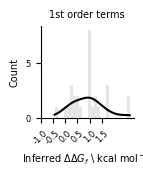

In [11]:
print("Biophysical model\n(1st order)")
for group in coefs_1storder.loc[coefs_1storder['order']>0].groupby('order'):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    sns.histplot(group[1]['mean_kcal_mol'], kde=True, bins=25, alpha=0.1,linewidth=0, color='k',ax=ax)
    ax.spines[['top','right']].set_visible(False)
    #plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    ax.set_ylabel('Count', fontsize=7)
    ax.set_xticks(np.arange(-1,2,0.5),np.arange(-1,2,0.5),fontsize=6, rotation=45)
    if group[1].iloc[0]['order']==1:
        ax.set_xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('1st order terms', fontsize=7)
    if group[1].iloc[0]['order']>1:
        ax.set_xlabel(r'Inferred ${ΔΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('2nd order terms', fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_Mochi_1stordermodel_order'+str(group[1].iloc[0]['order'])+'terms_hist.svg', dpi=300, transparent=True, bbox_inches='tight')

Biophysical model
(2nd order)


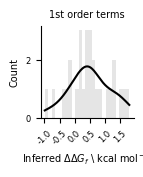

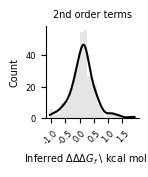

In [12]:
print("Biophysical model\n(2nd order)")
for group in coefs_2ndorder.loc[coefs_2ndorder['order']>0].groupby('order'):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    sns.histplot(group[1]['mean_kcal_mol'], kde=True, bins=25, alpha=0.1,linewidth=0, color='k',ax=ax)
    ax.spines[['top','right']].set_visible(False)
    plt.yticks(fontsize=6)
    ax.set_ylabel('Count', fontsize=7)
    ax.set_xticks(np.arange(-1,2,0.5),np.arange(-1,2,0.5),fontsize=6, rotation=45)
    if group[1].iloc[0]['order']==1:
        ax.set_xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('1st order terms', fontsize=7)
    if group[1].iloc[0]['order']>1:
        ax.set_xlabel(r'Inferred ${ΔΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('2nd order terms', fontsize=7)
        
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_Mochi_2ndordermodel_order'+str(group[1].iloc[0]['order'])+'terms_hist.svg', dpi=300, transparent=True, bbox_inches='tight')

Biophysical model
(2nd order
sparse regularized)


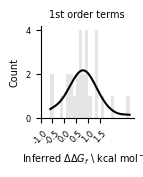

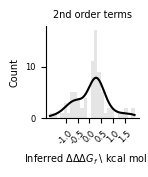

In [13]:
print("Biophysical model\n(2nd order\nsparse regularized)")
for group in coefs_2ndorder_sprsreg.loc[coefs_2ndorder_sprsreg['order']>0].groupby('order'):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    sns.histplot(group[1]['mean_kcal_mol'], kde=True, bins=25, alpha=0.1,linewidth=0, color='k',ax=ax)
    ax.spines[['top','right']].set_visible(False)
    plt.yticks(fontsize=6)
    ax.set_ylabel('Count', fontsize=7)
    ax.set_xticks(np.arange(-1,2,0.5),np.arange(-1,2,0.5),fontsize=6, rotation=45)
    if group[1].iloc[0]['order']==1:
        ax.set_xlabel(r'Inferred ${ΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('1st order terms', fontsize=7)
    if group[1].iloc[0]['order']>1:
        ax.set_xlabel(r'Inferred ${ΔΔΔG_{f}}$ \ kcal mol$^-$$^1$', fontsize=7)
        ax.set_title('2nd order terms', fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('FYN_Mochi_2ndordersprsregmodel_order'+str(group[1].iloc[0]['order'])+'terms_hist.svg', dpi=300, transparent=True, bbox_inches='tight')

## Panel d

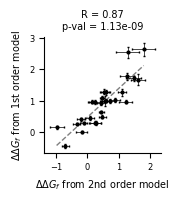

In [14]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

coefs_1storder = coefs_1storder.rename(columns={'mean_kcal_mol':'mean_kcal_mol_1storder', 'std_kcal_mol':'std_kcal_mol_1storder'})
coefs_2ndorder = coefs_2ndorder.rename(columns={'mean_kcal_mol':'mean_kcal_mol_2ndorder', 'std_kcal_mol':'std_kcal_mol_2ndorder'})

vs_model = coefs_1storder.loc[coefs_1storder['order']==1].merge(coefs_2ndorder.loc[coefs_2ndorder['order']==1], left_on='id_ref', right_on='id_ref')

vs_model=vs_model.sort_values('mean_kcal_mol_2ndorder').loc[vs_model['order_x']==1]

x = vs_model[['mean_kcal_mol_2ndorder']].to_numpy()
y = vs_model[['mean_kcal_mol_1storder']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax=plt.subplots(figsize=(1.5,1.5))
plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
ax.errorbar(vs_model[['mean_kcal_mol_2ndorder']].to_numpy().ravel(),vs_model[['mean_kcal_mol_1storder']].to_numpy().ravel(),vs_model[['std_kcal_mol_1storder']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder']].to_numpy().ravel(), color='k',linewidth=0,
           markersize=2,marker='o', capsize=0.5, elinewidth=0.5)
ax.set_ylabel(r'${ΔΔG_{f}}$ from 1st order model', fontsize=7)
ax.set_xlabel(r'${ΔΔG_{f}}$ from 2nd order model', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_1storderterms_2ndorder_vs_1storder_FoldingddGs_TrueWT_recalibrated.svg', dpi=300, transparent=True, bbox_inches='tight')


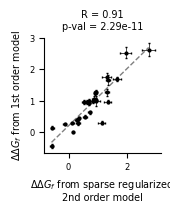

In [15]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

coefs_2ndorder_sprsreg = coefs_2ndorder_sprsreg.rename(columns={'mean_kcal_mol':'mean_kcal_mol_2ndorder_sprsreg', 'std_kcal_mol':'std_kcal_mol_2ndorder_sprsreg'})

vs_model = coefs_1storder.loc[coefs_1storder['order']==1].merge(coefs_2ndorder_sprsreg.loc[coefs_2ndorder_sprsreg['order']==1], left_on='id_ref', right_on='id_ref')

vs_model=vs_model.sort_values('mean_kcal_mol_2ndorder_sprsreg').loc[vs_model['order_x']==1]

x = vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy()
y = vs_model[['mean_kcal_mol_1storder']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax=plt.subplots(figsize=(1.5,1.5))
plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
ax.errorbar(vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['mean_kcal_mol_1storder']].to_numpy().ravel(),vs_model[['std_kcal_mol_1storder']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(), color='k',linewidth=0,
           markersize=2,marker='o', capsize=0.5, elinewidth=0.5)
ax.set_ylabel(r'${ΔΔG_{f}}$ from 1st order model', fontsize=7)
ax.set_xlabel(r'${ΔΔG_{f}}$ from sparse regularized'+'\n2nd order model', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_1storderterms_2ndorder_sprsreg_vs_1storder_FoldingddGs_TrueWT_recalibrated.svg', dpi=300, transparent=True, bbox_inches='tight')


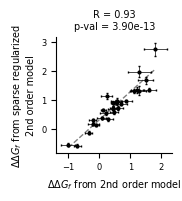

In [16]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

coefs_2ndorder = coefs_2ndorder.rename(columns={'mean_kcal_mol':'mean_kcal_mol_2ndorder', 'std_kcal_mol':'std_kcal_mol_2ndorder'})

vs_model = coefs_2ndorder_sprsreg.loc[coefs_2ndorder_sprsreg['order']==1].merge(coefs_2ndorder.loc[coefs_2ndorder['order']==1], left_on='id_ref', right_on='id_ref')

vs_model=vs_model.sort_values('mean_kcal_mol_2ndorder').loc[vs_model['order_x']==1]

x = vs_model[['mean_kcal_mol_2ndorder']].to_numpy()
y = vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax=plt.subplots(figsize=(1.5,1.5))
plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
ax.errorbar(vs_model[['mean_kcal_mol_2ndorder']].to_numpy().ravel(),vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder']].to_numpy().ravel(), color='k',linewidth=0,
           markersize=2,marker='o', capsize=0.5, elinewidth=0.5)
ax.set_ylabel(r'${ΔΔG_{f}}$ from sparse regularized'+'\n2nd order model', fontsize=7)
ax.set_xlabel(r'${ΔΔG_{f}}$ from 2nd order model', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_sprsregterms_2ndorder_vs_2ndorder_sprsreg_FoldingddGs_TrueWT_recalibrated.svg', dpi=300, transparent=True, bbox_inches='tight')


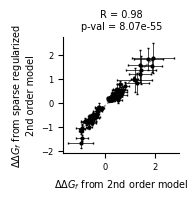

In [17]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

coefs_2ndorder = coefs_2ndorder.rename(columns={'mean_kcal_mol':'mean_kcal_mol_2ndorder', 'std_kcal_mol':'std_kcal_mol_2ndorder'})

vs_model = coefs_2ndorder_sprsreg.loc[coefs_2ndorder_sprsreg['order']==2].merge(coefs_2ndorder.loc[coefs_2ndorder['order']==2], left_on='id_ref', right_on='id_ref')

vs_model=vs_model.sort_values('mean_kcal_mol_2ndorder').loc[vs_model['order_x']==2]

x = vs_model[['mean_kcal_mol_2ndorder']].to_numpy()
y = vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

fig, ax=plt.subplots(figsize=(1.5,1.5))
plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
ax.errorbar(vs_model[['mean_kcal_mol_2ndorder']].to_numpy().ravel(),vs_model[['mean_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder_sprsreg']].to_numpy().ravel(),vs_model[['std_kcal_mol_2ndorder']].to_numpy().ravel(), color='k',linewidth=0,
           markersize=2,marker='o', capsize=0.5, elinewidth=0.5)
ax.set_ylabel(r'${ΔΔG_{f}}$ from sparse regularized'+'\n2nd order model', fontsize=7)
ax.set_xlabel(r'${ΔΔG_{f}}$ from 2nd order model', fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6)
plt.title('R = '+str(round(r,2))+ '\np-val = '+'{:0.2e}'.format(p), fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('FYN_Mochi_2ndorder_sprsregterms_2ndorder_vs_2ndorder_sprsreg_FoldingddGs_TrueWT_recalibrated.svg', dpi=300, transparent=True, bbox_inches='tight')
